In [1]:
import sys
import numpy
import matplotlib
import pandas
import sklearn

print('Python: {}'.format(sys.version))
print('numpy: {}'.format(numpy.__version__))
print('matplotlib: {}'.format(matplotlib.__version__))
print('pandas: {}'.format(pandas.__version__))
print('sklearn: {}'.format(sklearn.__version__))

Python: 3.7.6 (default, Jan  8 2020, 20:23:39) [MSC v.1916 64 bit (AMD64)]
numpy: 1.18.1
matplotlib: 3.1.3
pandas: 0.24.2
sklearn: 0.22.1


In [2]:
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.metrics import classification_report, accuracy_score
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# import the uci pima indians diabetes dataset
url = "diabetes.csv"
names = ['n_pregnant', 'glucose_concentration', 'blood_pressuer (mm Hg)', 'skin_thickness (mm)', 'serum_insulin (mu U/ml)',
        'BMI', 'pedigree_function', 'age', 'class']
df = pd.read_csv(url, names = names)

In [4]:
df.replace('?',-99999,inplace=True)
print(df.axes)

[RangeIndex(start=0, stop=768, step=1), Index(['n_pregnant', 'glucose_concentration', 'blood_pressuer (mm Hg)',
       'skin_thickness (mm)', 'serum_insulin (mu U/ml)', 'BMI',
       'pedigree_function', 'age', 'class'],
      dtype='object')]


In [7]:
print(df)

     n_pregnant  glucose_concentration  blood_pressuer (mm Hg)  \
0             6                    148                      72   
1             1                     85                      66   
2             8                    183                      64   
3             1                     89                      66   
4             0                    137                      40   
5             5                    116                      74   
6             3                     78                      50   
7            10                    115                       0   
8             2                    197                      70   
9             8                    125                      96   
10            4                    110                      92   
11           10                    168                      74   
12           10                    139                      80   
13            1                    189                      60   
14        

In [8]:
print(df.describe())

       n_pregnant  glucose_concentration  blood_pressuer (mm Hg)  \
count  768.000000             768.000000              768.000000   
mean     3.845052             120.894531               69.105469   
std      3.369578              31.972618               19.355807   
min      0.000000               0.000000                0.000000   
25%      1.000000              99.000000               62.000000   
50%      3.000000             117.000000               72.000000   
75%      6.000000             140.250000               80.000000   
max     17.000000             199.000000              122.000000   

       skin_thickness (mm)  serum_insulin (mu U/ml)         BMI  \
count           768.000000               768.000000  768.000000   
mean             20.536458                79.799479   31.992578   
std              15.952218               115.244002    7.884160   
min               0.000000                 0.000000    0.000000   
25%               0.000000                 0.000000 

In [9]:
columns = ['glucose_concentration', 'blood_pressuer (mm Hg)', 'skin_thickness (mm)', 'serum_insulin (mu U/ml)', 'BMI']
for col in columns:
    df[col].replace(0,np.NaN,inplace=True)


In [10]:
# Drop the rows with missing values
df.dropna(inplace=True)

# summarize the number of rows and columns in df
df.describe()

,n_pregnant,glucose_concentration,blood_pressuer (mm Hg),skin_thickness (mm),serum_insulin (mu U/ml),BMI,pedigree_function,age,class
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,3.301020,122.627551,70.663265,29.145408,156.056122,33.086224,0.523046,30.864796,0.331633
std,3.211424,30.860781,12.496092,10.516424,118.841690,7.027659,0.345488,10.200777,0.471401
min,0.000000,56.000000,24.000000,7.000000,14.000000,18.200000,0.085000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,21.000000,76.750000,28.400000,0.269750,23.000000,0.000000
50%,2.000000,119.000000,70.000000,29.000000,125.500000,33.200000,0.449500,27.000000,0.000000
75%,5.000000,143.000000,78.000000,37.000000,190.000000,37.100000,0.687000,36.000000,1.000000
max,17.000000,198.000000,110.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


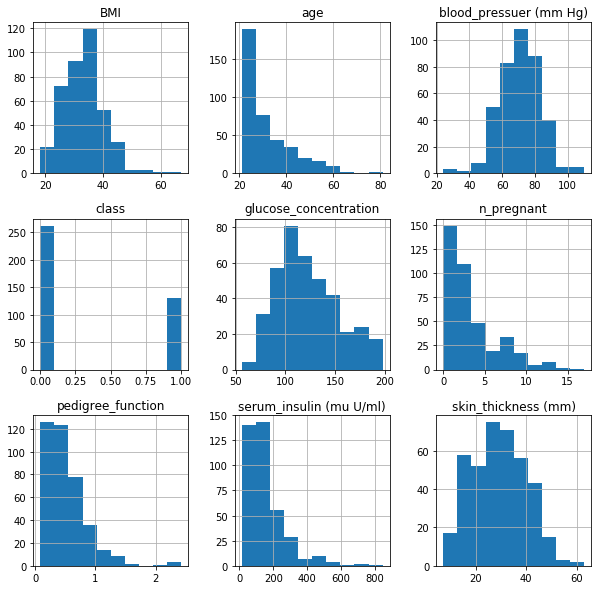

In [11]:
df.hist(figsize = (10, 10))
plt.show()

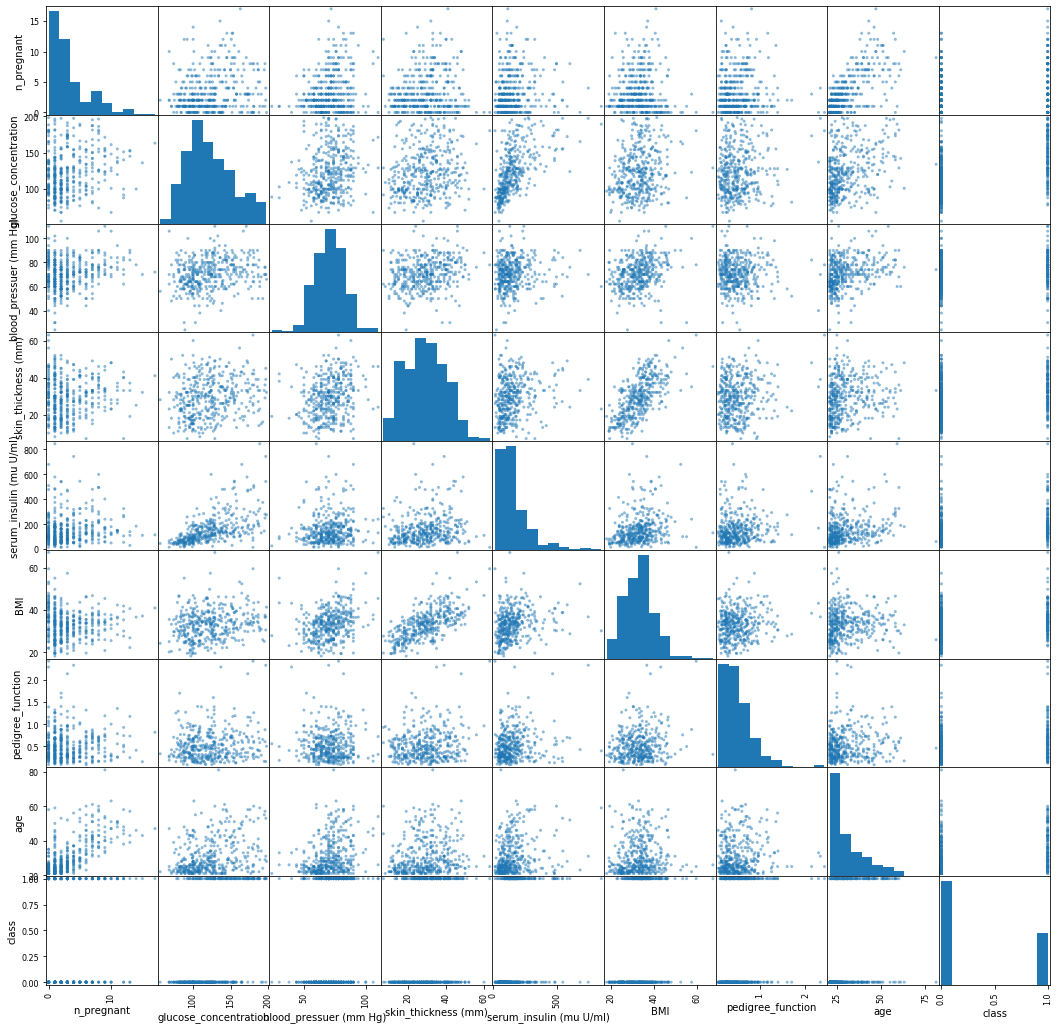

In [12]:
scatter_matrix(df,figsize=(18,18))
plt.show()

In [27]:
col = ['n_pregnant', 'glucose_concentration', 'blood_pressuer (mm Hg)', 'skin_thickness (mm)', 'serum_insulin (mu U/ml)', 
       'BMI', 'pedigree_function', 'age']
target='class'
X=df[col]
y=df[target].astype(int)

In [28]:
# Normalize the data using sklearn StandardScaler
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler().fit(X)
print(scaler)

StandardScaler(copy=True, with_mean=True, with_std=True)


In [29]:
# Transform and display the training data
X_standardized = scaler.transform(X)
data = pd.DataFrame(X_standardized)
data.describe()

,0,1,2,3,4,5,6,7
count,3.920000e+02,3.920000e+02,3.920000e+02,3.920000e+02,3.920000e+02,3.920000e+02,3.920000e+02,3.920000e+02
mean,-4.021726e-17,3.129583e-17,-4.641624e-16,1.042250e-16,6.485742e-17,1.543550e-16,3.880116e-17,1.028089e-16
std,1.001278e+00,1.001278e+00,1.001278e+00,1.001278e+00,1.001278e+00,1.001278e+00,1.001278e+00,1.001278e+00
min,-1.029213e+00,-2.161731e+00,-3.739001e+00,-2.108484e+00,-1.196867e+00,-2.120941e+00,-1.269525e+00,-9.682991e-01
25%,-7.174265e-01,-7.665958e-01,-6.941640e-01,-7.755315e-01,-6.681786e-01,-6.676780e-01,-7.340909e-01,-7.719850e-01
50%,-4.056403e-01,-1.176959e-01,-5.314565e-02,-1.384444e-02,-2.574448e-01,1.621036e-02,-2.131475e-01,-3.793569e-01
75%,5.297185e-01,6.609841e-01,5.878727e-01,7.478426e-01,2.859877e-01,5.718696e-01,4.751644e-01,5.040564e-01
max,4.271153e+00,2.445459e+00,3.151946e+00,3.223325e+00,5.812990e+00,4.846172e+00,5.497667e+00,4.921123e+00


In [364]:
#X=np.array(df.drop(['class'],1))
#y=np.array(df['class'])
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_standardized, y, test_size=0.2)

models=[]
models.append(('KNN',KNeighborsClassifier(n_neighbors=6)))
models.append(('SVM',SVC(kernel='linear')))
#models.append(('SVM',SVC(kernel='rbf')))
#models.append(('SVM',SVC(kernel='poly')))
#models.append(('SVM',SVC(kernel='sigmoid')))

results = []
names = []

for name,model in models:
    kfold=model_selection.KFold(n_splits=10, random_state = 0, shuffle=True)
    cv_results=model_selection.cross_val_score(model,X_train,y_train,cv=kfold,scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print("{}:accuracy->{}(std->{})".format(name, cv_results.mean(), cv_results.std()))

    
for name, model in models:
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print(name)
    print(accuracy_score(y_test, predictions))
    print(classification_report(y_test, predictions))

KNN:accuracy->0.7065524193548388(std->0.06776930670629303)
SVM:accuracy->0.7482862903225806(std->0.08906984481918345)
KNN
0.8734177215189873
              precision    recall  f1-score   support

           0       0.87      0.98      0.92        61
           1       0.90      0.50      0.64        18

    accuracy                           0.87        79
   macro avg       0.88      0.74      0.78        79
weighted avg       0.88      0.87      0.86        79

SVM
0.9240506329113924
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        61
           1       0.83      0.83      0.83        18

    accuracy                           0.92        79
   macro avg       0.89      0.89      0.89        79
weighted avg       0.92      0.92      0.92        79

